# Diabetes Prediction Using Unsupervised Machine Learning

## Project Description

The aim of this final project of Unsupervised Machine Learning Course is to implement a project that contains a development of a pre-trained unsupervised machine learning model, clustering people with diabetes conditions based on collected and pre-processed dataset. There will be two main outcomes of this pre-trained unsupervised machine learning model, a patient with diabetes and patient without diabetes. Nowadays, most of the patients go to the hospitals and other healthcare providers to follow up on their health conditions and maintain their physical wellbeings. First, this project will clean, process, analyze the input dataset within Exploratory Data Analysis (EDA) Section outlined below. Also, this project will include data visualization with six scatterplots as part of EDA to visualize the relationships among different features or factors from this dataset. Furthermore, this project will technically encompass at least one of the clustering algorithms to build unsupervised machine learning models, such as K-Means Clustering and Hierarical Clustering Algorithms. Finally, this project will evaluate the accuracy of pre-trained unsupervised machine learning models by using their assigned model accuracy metrics, classification reports, as well as confusion matrices. Therefore, this project will solve the issue of diabetes prediction by utilizing the input dataset to build pre-trained unsupervised machine learning models for enhancing decision-making process of diabetes prediction.

## Installing Project Modules

In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install seaborn
!pip3 install statsmodels
!pip3 install tensorflow
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Libraries/Modules

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Collection and Pre-Processing

In [3]:
diabetesData = pd.read_csv("./diabetes_data.csv")
diabetesData.head(10)

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234
5,6,2021-01-06,66.487946,173.934854,148.531748,3.290369,0,1,0,7.901651,0,22.0,32.012889
6,7,2021-01-07,93.688192,178.951932,140.048219,39.720726,1,1,2,8.673952,1,29.3,30.069819
7,8,2021-01-08,81.511521,176.351718,107.316455,0.000000,1,1,0,6.292043,1,26.2,33.000000
8,9,2021-01-09,62.957884,180.495527,166.369827,51.653821,0,1,0,8.419547,1,19.3,12.086545
9,10,2021-01-10,78.138401,164.647648,177.502806,20.577507,0,1,1,12.000000,1,28.8,46.826748


## Data Cleaning and Preparation

In [4]:
diabetesData = diabetesData.dropna()
string_columns = diabetesData.select_dtypes(include=['object']).columns
diabetesData = diabetesData.drop(columns=string_columns, axis=1)
diabetesData.head(20)

,user_id,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234
5,6,66.487946,173.934854,148.531748,3.290369,0,1,0,7.901651,0,22.0,32.012889
6,7,93.688192,178.951932,140.048219,39.720726,1,1,2,8.673952,1,29.3,30.069819
7,8,81.511521,176.351718,107.316455,0.000000,1,1,0,6.292043,1,26.2,33.000000
8,9,62.957884,180.495527,166.369827,51.653821,0,1,0,8.419547,1,19.3,12.086545
9,10,78.138401,164.647648,177.502806,20.577507,0,1,1,12.000000,1,28.8,46.826748


## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Relationship between Sleep Hours and Physical Activity')

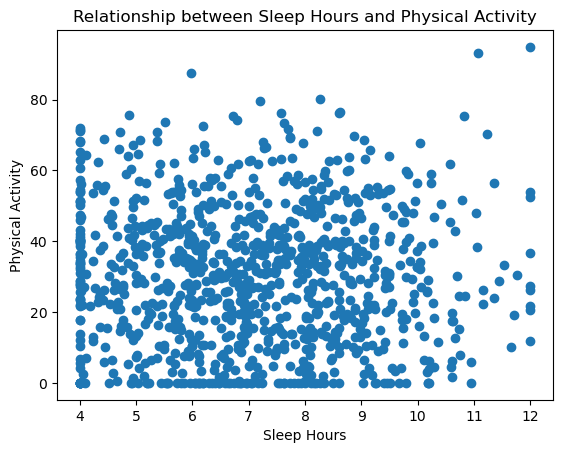

In [6]:
plt.scatter(np.array(diabetesData["sleep_hours"]), np.array(diabetesData["physical_activity"]))
plt.xlabel("Sleep Hours")
plt.ylabel("Physical Activity")
plt.title("Relationship between Sleep Hours and Physical Activity")

Text(0.5, 1.0, 'Relationship between Weight and Height')

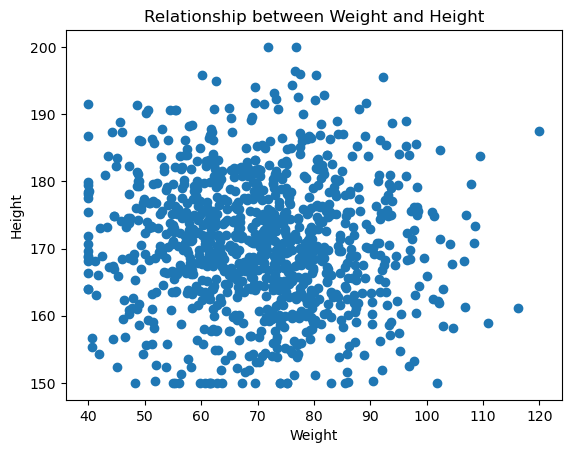

In [7]:
plt.scatter(np.array(diabetesData["weight"]), np.array(diabetesData["height"]))
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Relationship between Weight and Height")

Text(0.5, 1.0, 'Relationship between BMI and Risk Score')

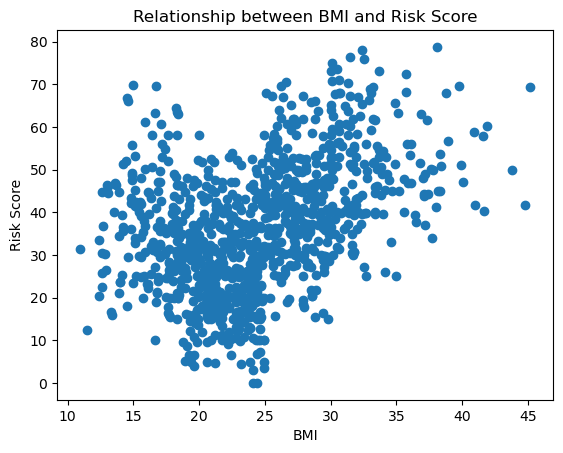

In [8]:
plt.scatter(np.array(diabetesData["bmi"]), np.array(diabetesData["risk_score"]))
plt.xlabel("BMI")
plt.ylabel("Risk Score")
plt.title("Relationship between BMI and Risk Score")

In [9]:
diabetesData.describe()

,user_id,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,70.361797,170.795375,140.818899,30.294497,0.604000,0.69300,0.950000,7.076312,0.710000,24.385500,36.422120
std,288.819436,14.467165,9.742934,38.064177,19.305165,0.489309,0.46148,0.833183,1.883829,0.453989,5.872022,14.898022
min,1.000000,40.000000,150.000000,70.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,10.900000,0.000000
25%,250.750000,60.286145,163.937583,114.080015,15.251591,0.000000,0.00000,0.000000,5.688762,0.000000,20.100000,25.746352
50%,500.500000,70.379509,170.630771,139.989969,30.003691,1.000000,1.00000,1.000000,6.998834,1.000000,24.100000,36.086756
75%,750.250000,79.719158,177.288822,166.436613,43.338908,1.000000,1.00000,2.000000,8.391989,1.000000,28.225000,46.402982
max,1000.000000,120.000000,200.000000,297.049508,94.861859,1.000000,1.00000,2.000000,12.000000,1.000000,45.200000,78.745396


## Feature Engineering

In [36]:
# Separate features and target
X = diabetesData.iloc[:, :-1]  # Features
y = diabetesData.iloc[:, -1]   # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Selection

In [53]:
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
# Example usage
hierarchical = AgglomerativeClustering(n_clusters=2)

## Model Training

In [54]:
kmeans.fit(X_scaled)

# Get the cluster labels
hierarchical_labels = hierarchical.fit_predict(diabetesData)
new_clusters = kmeans.labels_

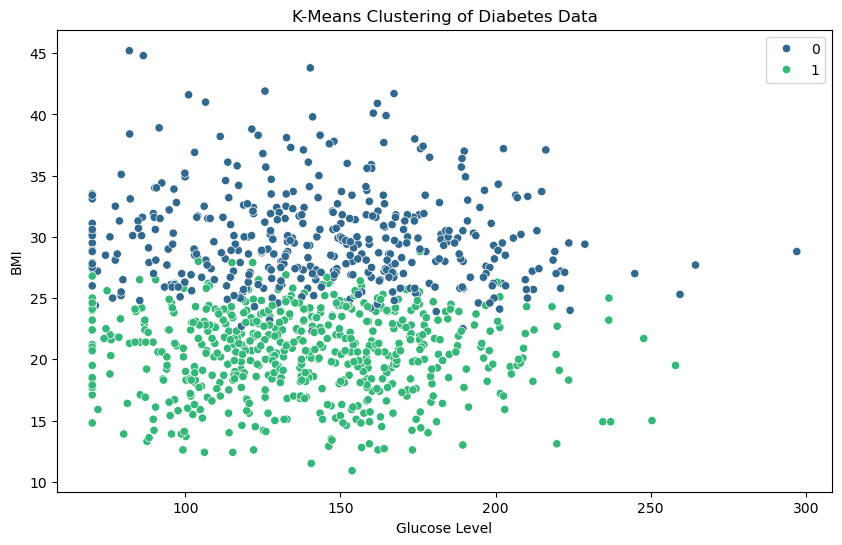

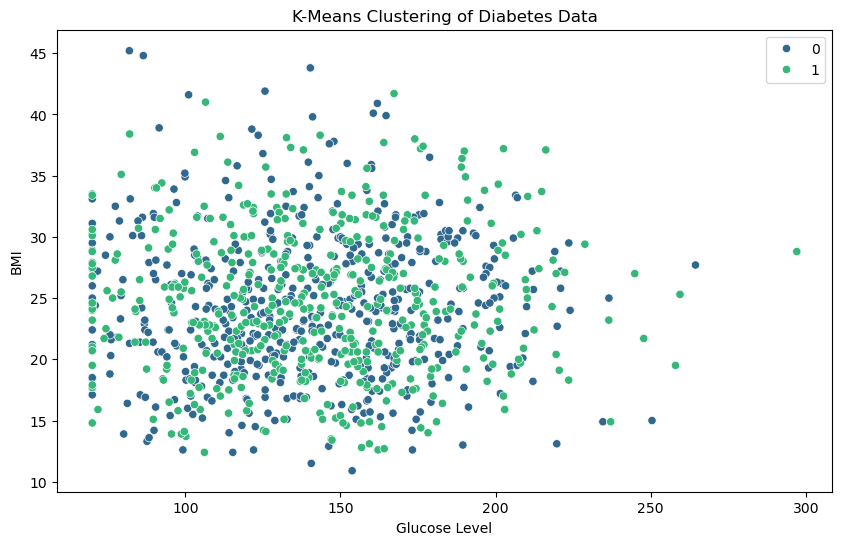

In [55]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=diabetesData['blood_glucose'], y=diabetesData['bmi'], hue=new_clusters, palette='viridis')
plt.title('K-Means Clustering of Diabetes Data')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.show()

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=diabetesData['blood_glucose'], y=diabetesData['bmi'], hue=hierarchical_labels, palette='viridis')
plt.title('K-Means Clustering of Diabetes Data')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.show()

## Model Evaluation

K-Means Classification Report
              precision    recall  f1-score   support

 No Diabetes       0.95      0.83      0.89       470
    Diabetes       0.87      0.96      0.91       530

    accuracy                           0.90      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



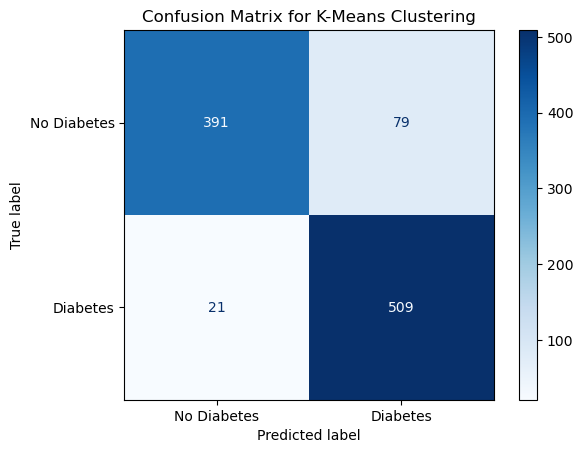

Accuracy: 0.90
Hierarchical Clustering Classification Report
              precision    recall  f1-score   support

 No Diabetes       0.00      0.00      0.00       470
    Diabetes       0.53      1.00      0.69       530

    accuracy                           0.53      1000
   macro avg       0.27      0.50      0.35      1000
weighted avg       0.28      0.53      0.37      1000



/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


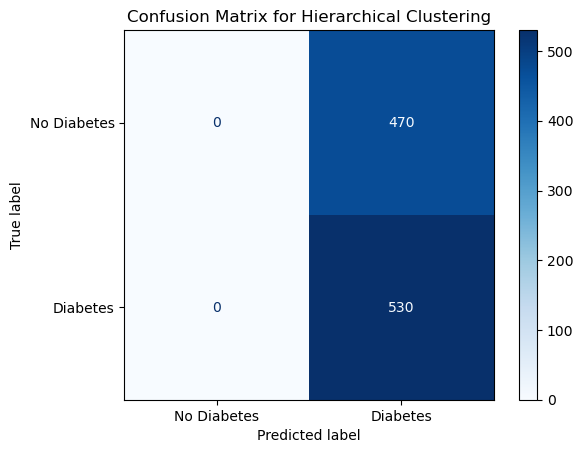

Accuracy: 0.53


In [56]:
# Create an array to store the mapped true labels
mapped_labels = np.zeros_like(new_clusters)

for i in range(2):  # Assuming 2 clusters
    mask = (new_clusters == i)
    if np.any(mask):
        # Map the cluster to the most common true label in that cluster
        mapped_labels[mask] = mode(y[mask]).mode[0]

report = classification_report(y, mapped_labels, target_names=["No Diabetes", "Diabetes"])
print("K-Means Classification Report")
print(report)

# Create a confusion matrix
cm = confusion_matrix(y, mapped_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for K-Means Clustering")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y, mapped_labels)
print(f'Accuracy: {accuracy:.2f}')

# Create an array to store the mapped true labels
mapped_hierarchical_labels = np.zeros_like(hierarchical_labels)

for i in range(2):  # Assuming 2 clusters
    mask = (hierarchical_labels == i)
    if np.any(mask):
        # Map the cluster to the most common true label in that cluster
        mapped_hierarchical_labels[mask] = mode(y[mask]).mode[0]

report2 = classification_report(y, mapped_hierarchical_labels, target_names=["No Diabetes", "Diabetes"])
print("Hierarchical Clustering Classification Report")
print(report2)

# Create a confusion matrix
cm2 = confusion_matrix(y, mapped_hierarchical_labels)

# Display the confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["No Diabetes", "Diabetes"])
disp2.plot(cmap='Blues')
plt.title("Confusion Matrix for Hierarchical Clustering")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y, mapped_hierarchical_labels)
print(f'Accuracy: {accuracy:.2f}')

## Discussion

Based on the results generated above, it shows that these two pre-trained unsupervised machine learning models, which are in this case K-Means Clustering and Hierarchical Clustering. K-Means Clustering has generated high accuracy rate, but Hierarchical Clustering has produced low to moderate accuracy rate based on the produced classification reports and confusion matrices as indicated above. First, I've imported and installed a collection of libraries in Python relevant to this project, including scikit-learn, pandas, numpy, seaborn, scipy, and matplotlib. Next, I've collected and pre-processed a dataset of diabetes prediction with a size of around 131 KB from Kaggle Website. After that, I've cleaned the already processed dataset by removing all null or NaN values from this dataset. Also, I've excluded all object type columns from this dataset because they weren't essential in this project as I was working with only numeric or quantitative variables to examine statistical relationships. Furthermore, Exploratory Data Analysis (EDA) has been performed to analyze and visualize the given input dataset that contained information of diabetes prediction and testing for patients at healthcare providers after cleaning and preparing the dataset itself. During the EDA, three scatterplots have been visualized for a variety of features or factors as predictor or independent variables to be fed into unsupervised machine learning models of K-Means Clustering and Hierarchical Clustering. The first scatterplot examined the correlation between sleep hours and physical activity, which represents a weak linear relationship as shown in the given plot above. The second scatterplot exhibited the correlation between weight and height, which represents a weak linear relationship as shown in the given plot above. The third scatterplot exhibited the correlation between bmi and risk score, which represents a moderate linear relationship as shown in the given plot above. At the end of EDA, I've summarized the cleaned and prepared dataset with statistically descriptive metrics, containing mean, median, standard deviation, maximum, minimum, as well as three quartiles (Q1, Q2, and Q3). Moreover, I've performed feature engineering, involving feature or factor selection building supervised machine learning models. As mentioned earlier, there were two unsupervised machine learning models have been trained and tested in this project, K-Means Clustering and Hierarchical Clustering. During this phase, these two models have been trained and tested to fit the predicted diabetic or non-diabetic labels from each model for predicting as many correct results as possible. At the end of this project, I've evaluated these two pretrained unsupervised machine learning models, K-Means Clustering and Hierarchical Clustering by including the following: Classification Reports, Confusion Matrices, and Accuracy Scores or Rates. As results have been yielded in this project, it was evident that one of these pre-trained unsupervised machine learning models has generated high accuracy rates while the other pre-trained unsupervised machine learning model has produced a low to moderate accuracy rate based on their produced classification reports and confusion matrices. For example, one of these models has approximately resulted in an accuracy rate of 90%, but the other model has resulted in an accuracy rate of 53%. The overall limitations of these pre-trained machine learning models were training and testing on an input dataset that wasn't large enough to maximize the models' performances based on their classification reports and confusion matrices.

## Conclusion

While this project exhibited the limitations of developing the selected pre-trained unsupervised machine learning models, this project generated quantifiable and measurable results demonstrating the performance of each selected pre-trained unsupervised machine learning model, which solved the problem of diabetes predictions for all patients that visit any healthcare providers universally.